In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

#Lendo o arquivo .csv e mostrando as 5 primeiras linhas.
dataset = pd.read_csv("C:/Users/PICHAU/PycharmProjects/Udemy/Arquivos/cars.csv", ",")
print(dataset.head())

   Unnamed: 0  speed  dist
0           1      4     2
1           2      4    10
2           3      7     4
3           4      7    22
4           5      8    16


In [91]:
#Removendo a primeira coluna, pois não será necessária.
dataset = dataset.drop(['Unnamed: 0'], 1)
print(dataset.head())

   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16


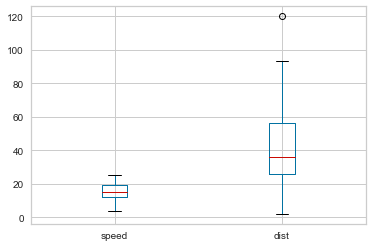

In [92]:
#Boxplot de cada coluna.
df = pd.DataFrame(dataset, columns=['speed', 'dist'])
boxplot = df.boxplot(column=['speed', 'dist'])

In [93]:
#Definindo a variável preditiva e a variável resposta. Como queremos prever a velocidade, y = speed. 
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values

In [94]:
#Mostrando o coefiente de correlação R de Pearson. O resultado mostra que ela é forte e positiva.
correlacao = np.corrcoef(X,y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [95]:
#Transformando a variável em uma coluna.
X = X.reshape(-1, 1)
X

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]], dtype=int64)

In [96]:
#Colocando os dados no modelo de Regressão.
modelo = LinearRegression().fit(X, y)

coef0 = modelo.intercept_ #beta0 ----> Altura da reta
coef1 = modelo.coef_ #beta1 ----->Angulação da reta

In [97]:
#Mostr o R^2, que representa quanto % dos dados aderem a uma reta 
r_score = modelo.score(X,y)
r_score * 100

65.10793807582509

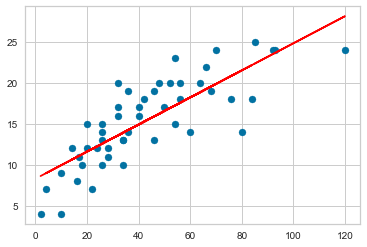

In [98]:
#Scatter plot com a reta de regressão.
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
plt.show()

In [99]:
#O resultado mostra que quando o X for igual a 22, y é aproximadamente 11.93.
previsao = modelo.predict([[22]])
previsao

array([11.92639228])

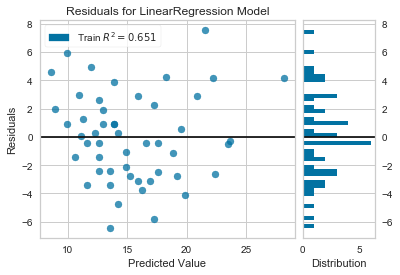

In [100]:
#Mostra os resíduos 
vizualizador = ResidualsPlot(modelo)
vizualizador.fit(X, y)
vizualizador.poof()